# Exploratory Data Analysis

### Imports

In [64]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [2]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)
    
measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [3]:
measures_df = measures_df.rename_axis(['network'])

In [36]:
measures_df = measures_df[(measures_df['average_shortest_path_lenght'] != np.inf) & (measures_df['closeness'] != np.nan)]
FEATURES = list(measures_df.columns)[1:]
measures_df.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,0.134973,0.302541,1522.851944,4.044704,0.230008,-0.018908,0.003183,0.007993,2.980314,40.393910
std,0.238953,0.101750,1151.472082,2.302944,0.173878,0.163531,0.000841,0.006720,1.210182,59.354528
min,0.008343,0.096122,548.311000,2.095622,0.048632,-0.394020,0.001307,0.003230,0.377454,3.452053
25%,0.023500,0.295687,1002.345000,3.003690,0.077912,-0.028069,0.002955,0.004963,2.621872,6.344289
50%,0.026425,0.313753,1101.902500,3.202805,0.101251,-0.005222,0.003437,0.005224,3.645626,14.142136
75%,0.032066,0.334649,1198.682000,3.396364,0.400087,0.117568,0.003652,0.005649,3.831956,32.907699
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004290,0.027219,4.027738,204.959142


### Simulations

In [5]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    df = pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1])
    simulations_file_list.append(df)

simulations_df = pd.concat(simulations_file_list)

In [6]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index()

In [7]:
simulations_df

,network,initialization,consensus_time,opinion_change_frequency
0,barabasi_linear_60.edgelist,random,471.08,248.74
1,barabasi_linear_60.edgelist,direct,535.92,200.00
2,barabasi_linear_60.edgelist,inverse,323.41,386.60
3,barabasi_linear_91.edgelist,random,431.67,248.66
4,barabasi_linear_91.edgelist,direct,519.85,200.00
...,...,...,...,...
1795,watts-strogatz_76.edgelist,direct,41172.93,7879.43
1796,watts-strogatz_76.edgelist,inverse,37483.28,6954.85
1797,watts-strogatz_69.edgelist,random,13790.04,1911.82
1798,watts-strogatz_69.edgelist,direct,43281.68,7024.76


### Merging and creating the dataset

In [8]:
dataset = measures_df.merge(simulations_df, on='network', how='inner')

In [9]:
from sklearn.preprocessing import LabelEncoder
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])
dataset.reset_index(inplace=True)

In [10]:
dataset

,index,network,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,initialization,consensus_time,opinion_change_frequency,groups
0,0,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,random,471.08,248.74,0
1,1,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,direct,535.92,200.00,0
2,2,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,inverse,323.41,386.60,0
3,3,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,random,431.67,248.66,0
4,4,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,direct,519.85,200.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1669,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,direct,41172.93,7879.43,4
1670,1670,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,inverse,37483.28,6954.85,4
1671,1671,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,0.560623,3.452053,random,13790.04,1911.82,4
1672,1672,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,0.560623,3.452053,direct,43281.68,7024.76,4


### Creating Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [43]:
measures_df[FEATURES]

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance
network,,,,,,,,,,
barabasi_linear_60.edgelist,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380
barabasi_linear_91.edgelist,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265
barabasi_linear_41.edgelist,0.031068,0.335096,1000.464,2.999928,0.077702,-0.027484,0.003420,0.004914,3.629634,34.928498
barabasi_linear_73.edgelist,0.028693,0.335415,998.483,2.995966,0.090226,-0.035959,0.003408,0.004883,3.609923,30.020826
barabasi_linear_52.edgelist,0.030809,0.332543,1011.472,3.021944,0.095066,-0.023867,0.003437,0.005010,3.642259,24.535688
...,...,...,...,...,...,...,...,...,...,...
watts-strogatz_71.edgelist,0.647961,0.114572,3916.996,8.832992,0.406220,-0.009041,0.001537,0.020998,0.546883,3.741657
watts-strogatz_53.edgelist,0.642519,0.117571,3790.674,8.580348,0.383648,-0.008082,0.001609,0.021597,0.614113,3.741657
watts-strogatz_67.edgelist,0.640451,0.122419,3627.605,8.254210,0.347707,-0.002856,0.001657,0.021003,0.656211,3.741657


In [ ]:
sns.plot

In [76]:
from sklearn.metrics.pairwise import pairwise_distances
feature_correlation = pairwise_distances(measures_df[FEATURES].T, metric='correlation')
feature_correlation = pd.DataFrame(feature_correlation, index=FEATURES)

In [94]:
NEW_FEATURES = ['clustering', 'closeness', 'average_shortest_path_lenght', 'eigenvector', 'assortativity', 'shannon_entropy', 'degree_variance']

<Axes: >

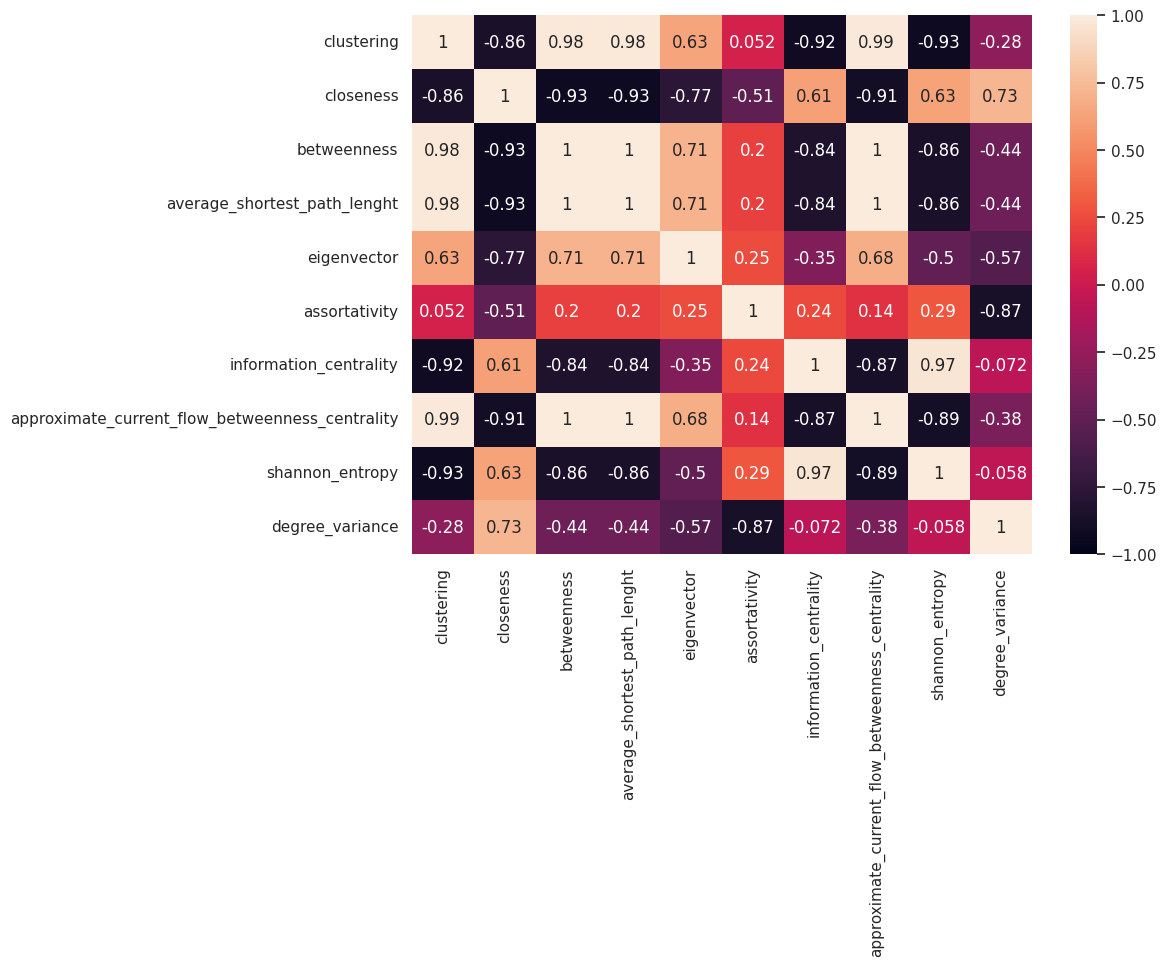

In [92]:
sns.set_theme(rc={'figure.figsize':(10,7)})
sns.heatmap(measures_df[FEATURES].corr(method='pearson'), annot=True, vmax=1, vmin=-1)

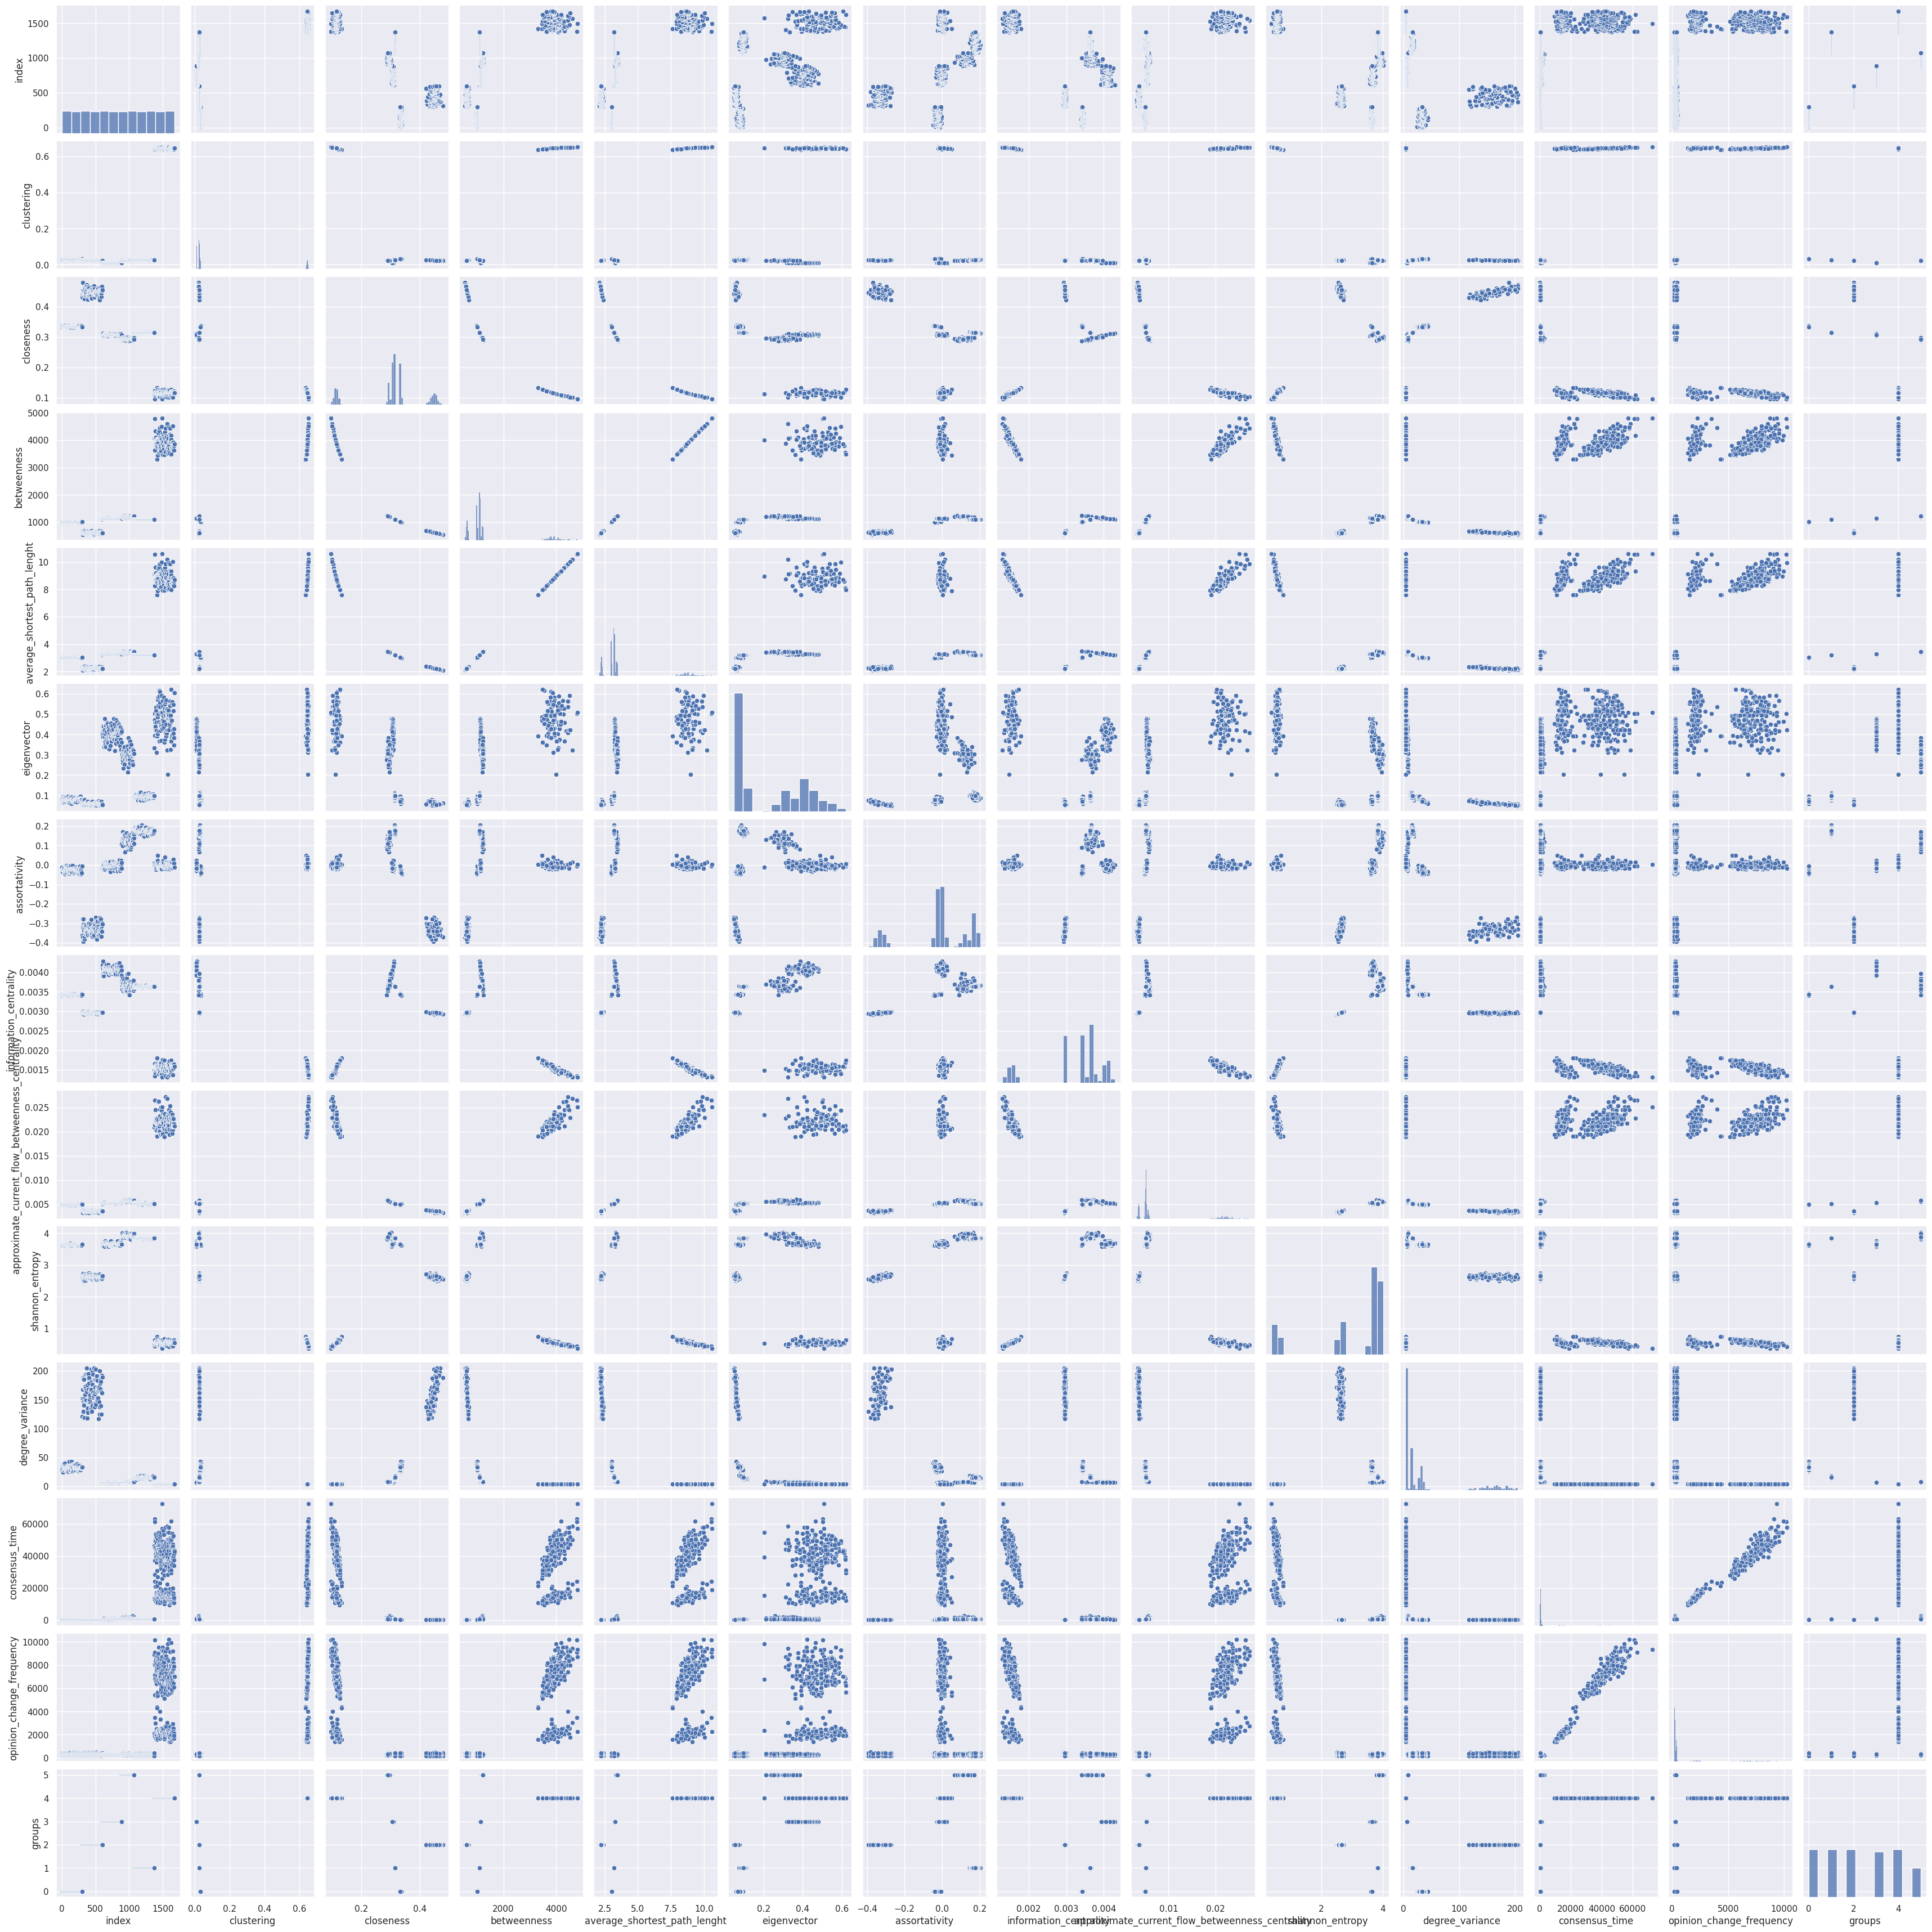

In [98]:
sns.pairplot(dataset)

## Networks Boxplots for each Measure

In [13]:
sns.set_theme(rc={'figure.figsize':(15,6)})

### Clustering
It is possible to see how Watts Strogatz networks presents elevated Clustering Coefficient

<Axes: xlabel='clustering'>

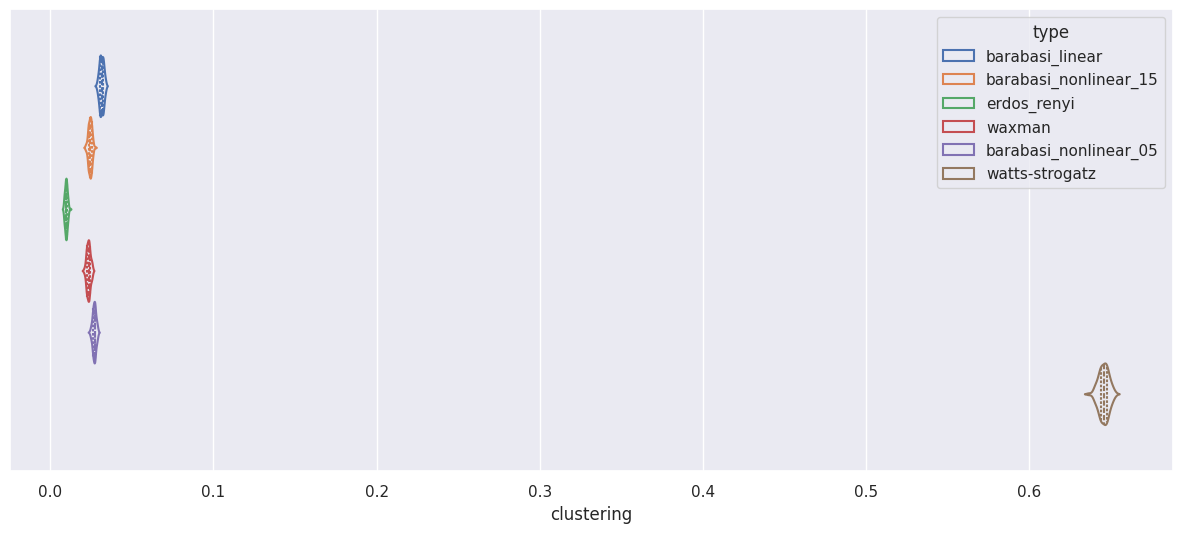

In [14]:
sns.violinplot(
    data=measures_df, 
    x="clustering", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Assortativity
The plot shows Barabasi Non-Linear with $p=1.5$ having negative assortativity, indicating the tendency of nodes to attach to different ones. There is a neutral pattern in Watts-Strogatz, Barabasi-Linear and Erdos Renyi graphs. At last, we see homophily happening with Waxman and Barabasi Non-Linear with $p=0.5$

<Axes: xlabel='assortativity'>

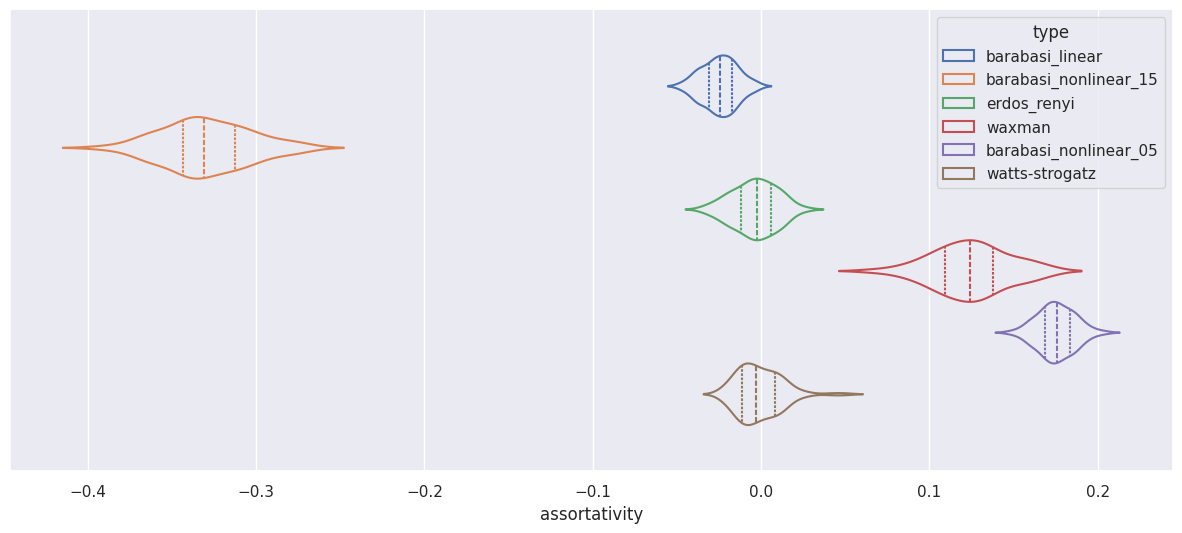

In [15]:
sns.violinplot(
    data=measures_df, 
    x="assortativity", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Closeness
At the extremes of the plot, we can see Watts-Strogatz networks having a smaller amount of central nodes and Barabasi Non-Linear with $p=1.5$ with high amount of central nodes

<Axes: xlabel='closeness'>

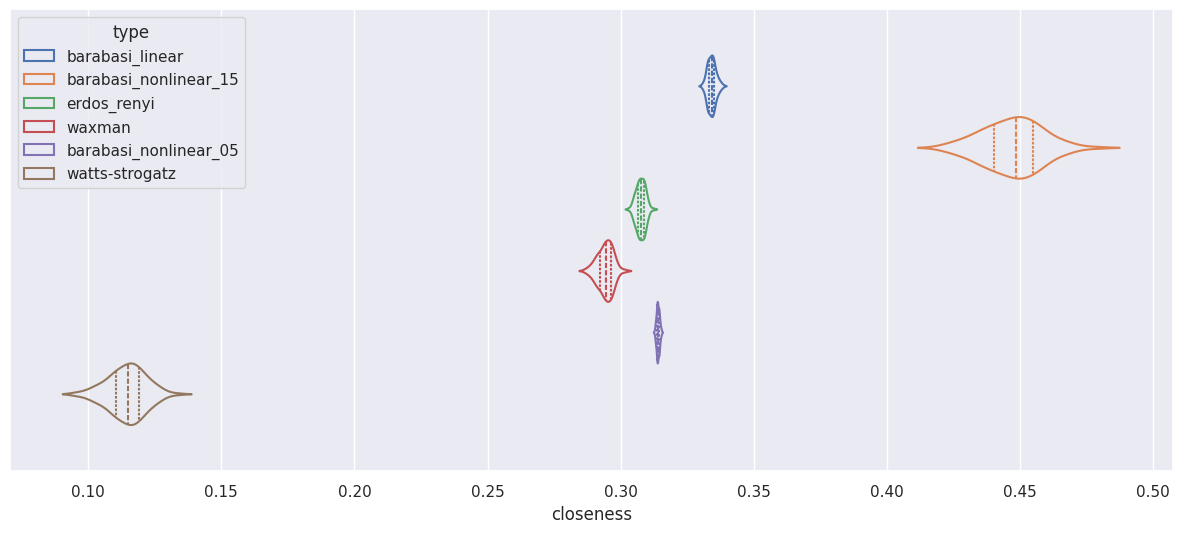

In [16]:
sns.violinplot(
    data=measures_df, 
    x="closeness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Betweenness

This graph shows clearly the disparity of Watts-Strogatz networks to have higher nodes that are present in Shortest Path Lenghts

<Axes: xlabel='betweenness'>

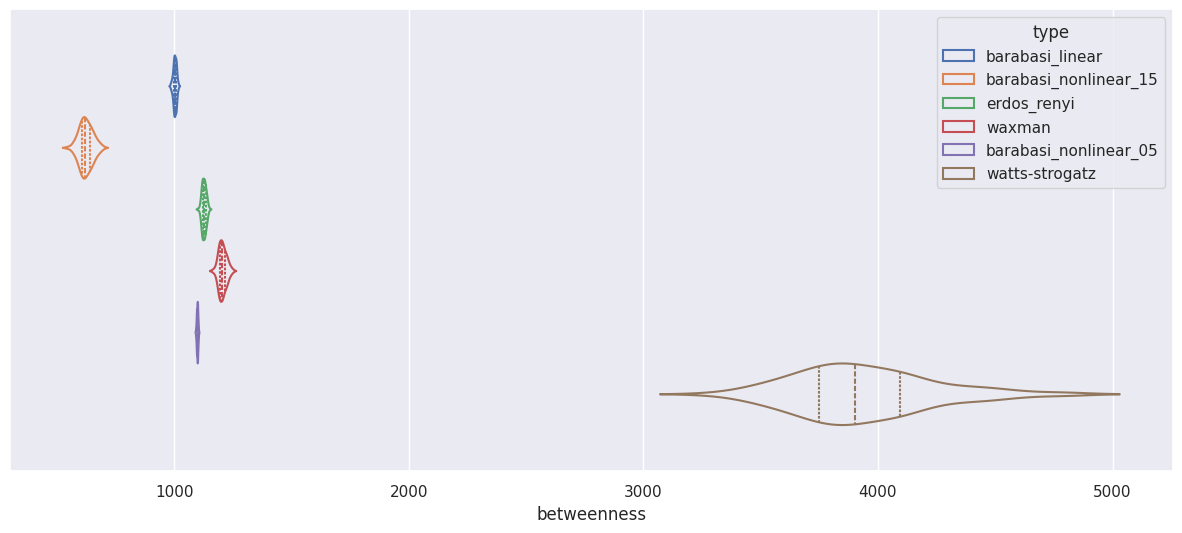

In [17]:
sns.violinplot(
    data=measures_df, 
    x="betweenness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Average Shortest Path Lenght
Watts-Strogatz is also the networks with higher Average Shortest Path Lenght

<Axes: xlabel='average_shortest_path_lenght'>

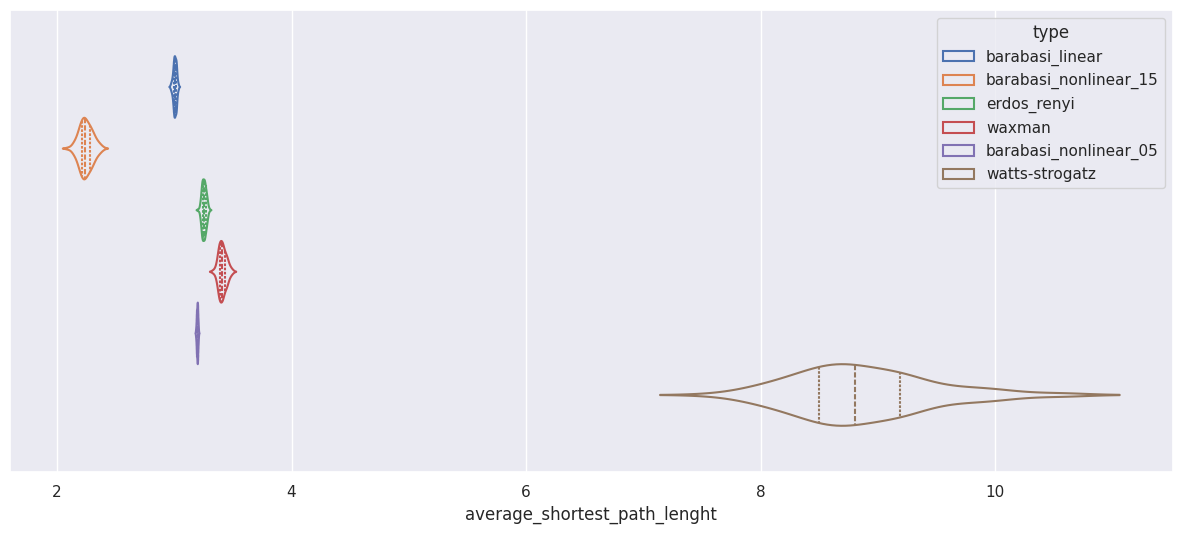

In [18]:
sns.violinplot(
    data=measures_df, 
    x="average_shortest_path_lenght", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Shannon Entropy

<Axes: xlabel='shannon_entropy'>

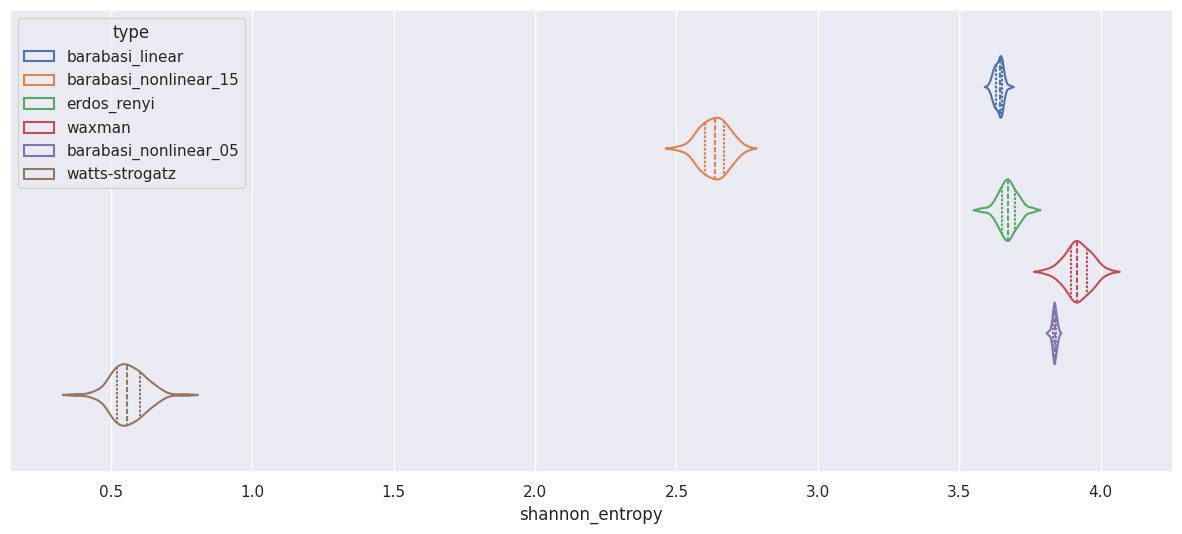

In [19]:
sns.violinplot(
    data=measures_df, 
    x="shannon_entropy", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Degree Variance

<Axes: xlabel='degree_variance'>

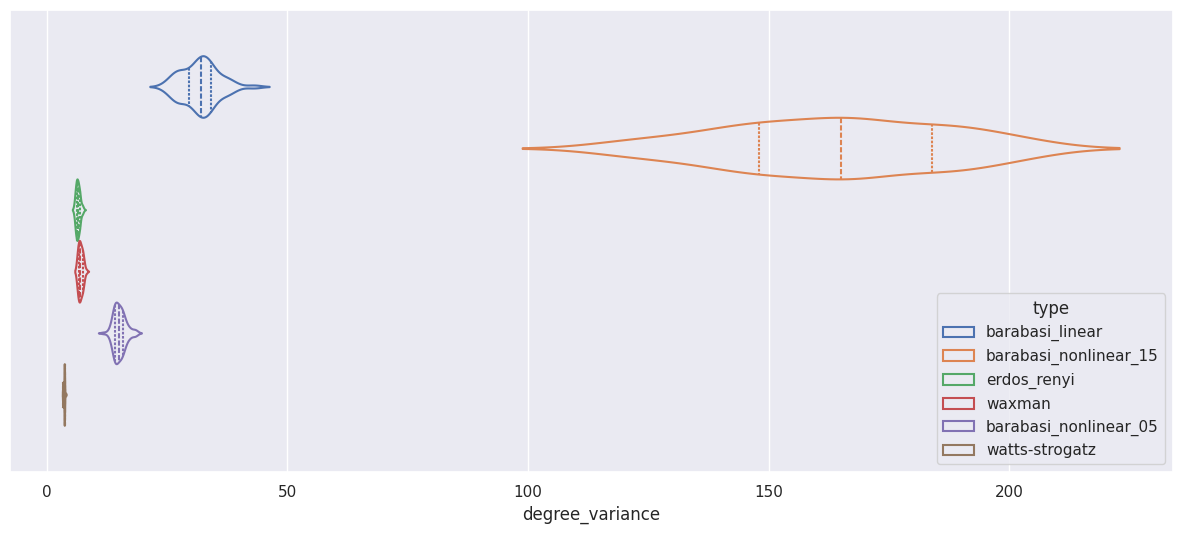

In [20]:
sns.violinplot(
    data=measures_df, 
    x="degree_variance", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Eigenvector

<Axes: xlabel='eigenvector'>

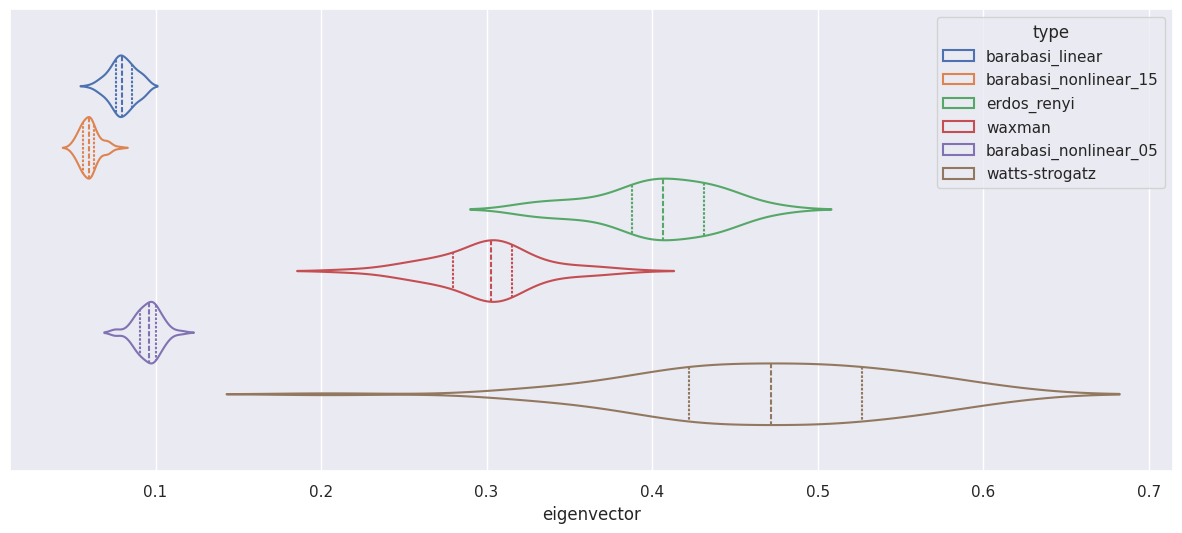

In [21]:
sns.violinplot(
    data=measures_df, 
    x="eigenvector", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Information Centrality
Centralidade de Informacao

<Axes: xlabel='information_centrality'>

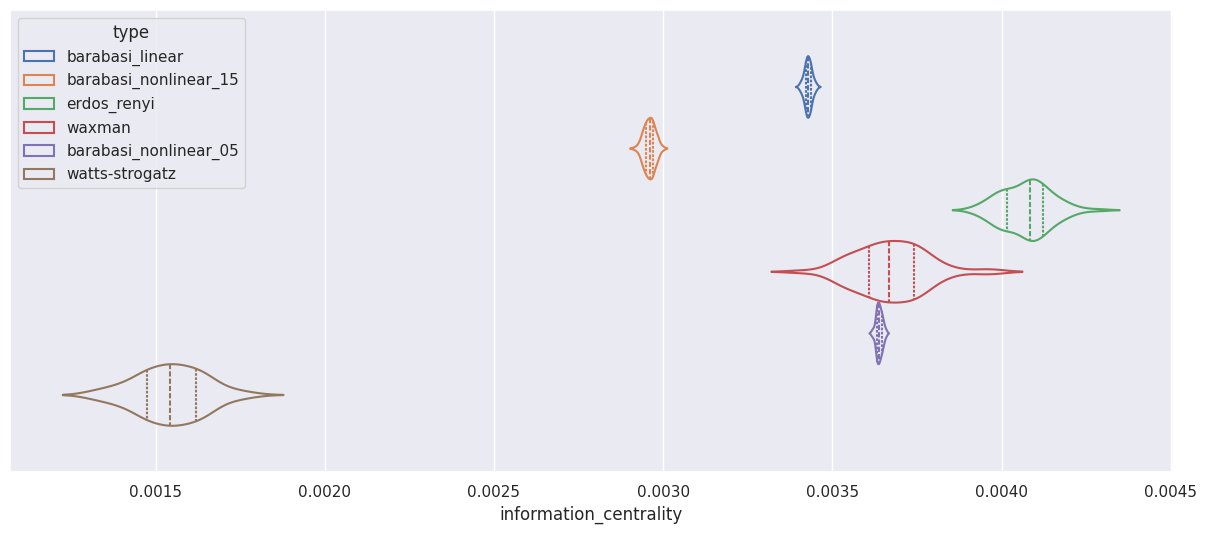

In [22]:
sns.violinplot(
    data=measures_df, 
    x="information_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Approximate Current Flow Betweenness Centrality

<Axes: xlabel='approximate_current_flow_betweenness_centrality'>

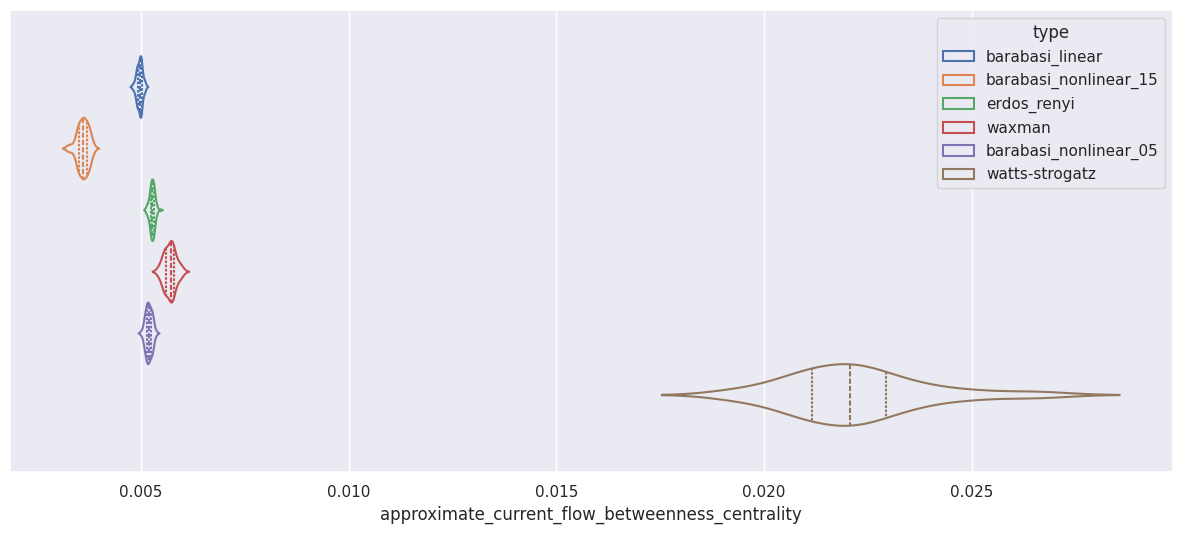

In [23]:
sns.violinplot(
    data=measures_df, 
    x="approximate_current_flow_betweenness_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

## Network Metrics for each Initialization

In [24]:
sns.set_theme()

In [25]:
np.unique(dataset['type'])

array(['barabasi_linear', 'barabasi_nonlinear_05',
       'barabasi_nonlinear_15', 'erdos_renyi', 'watts-strogatz', 'waxman'],
      dtype=object)

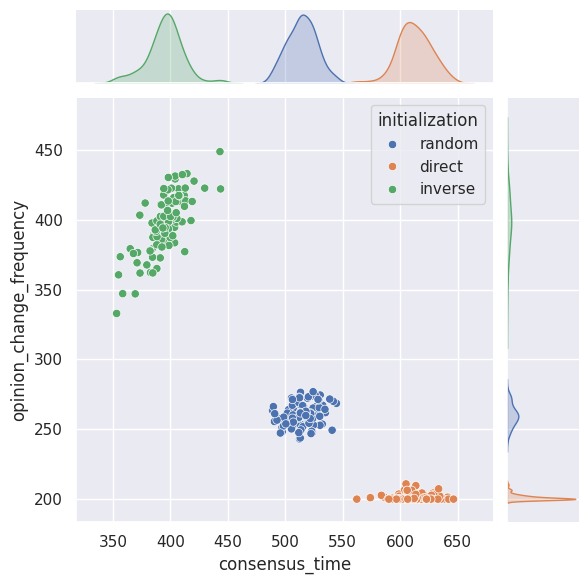

In [26]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_05'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
    # kind="kde",
)

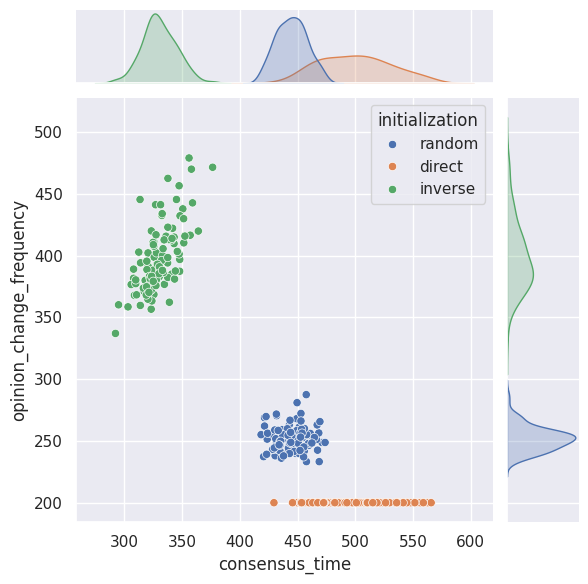

In [27]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_linear'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

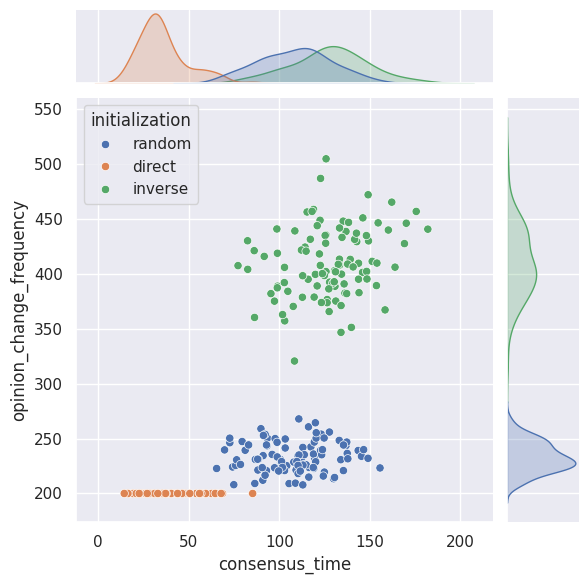

In [28]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_15'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

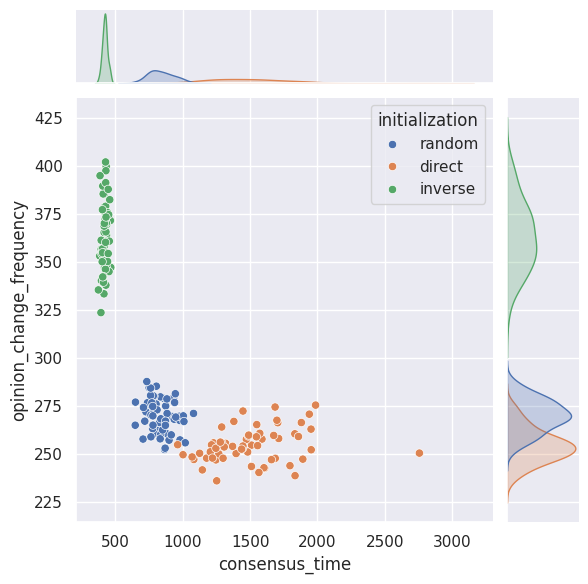

In [29]:
sns.jointplot(
    data=dataset[dataset['type'] == 'waxman'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

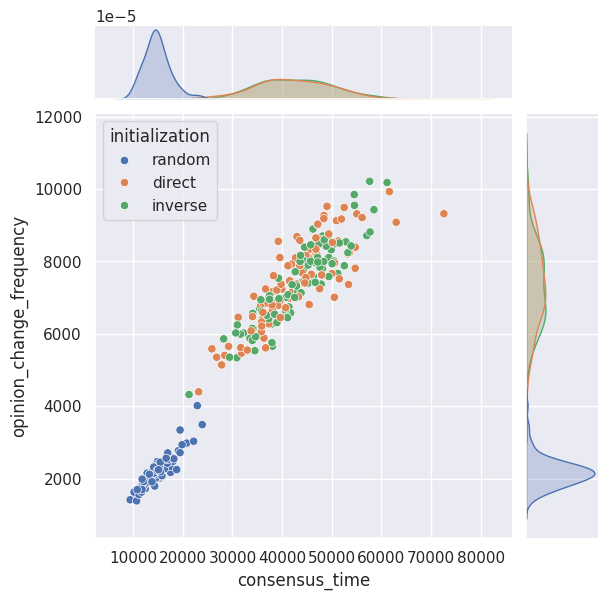

In [30]:
sns.jointplot(
    data=dataset[dataset['type'] == 'watts-strogatz'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

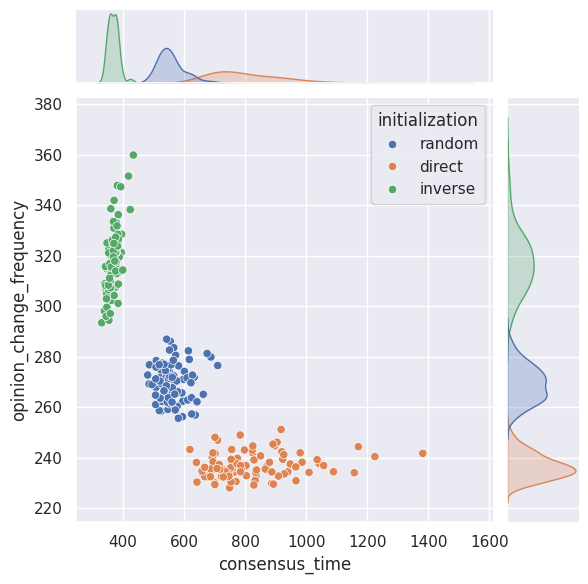

In [31]:
sns.jointplot(
    data=dataset[dataset['type'] == 'erdos_renyi'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)